<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Итоги" data-toc-modified-id="Итоги-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Итоги</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Общая-подготовка" data-toc-modified-id="Общая-подготовка-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Общая подготовка</a></span></li><li><span><a href="#Объединение-таблиц" data-toc-modified-id="Объединение-таблиц-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Объединение таблиц</a></span></li><li><span><a href="#Подсчет-прибыли" data-toc-modified-id="Подсчет-прибыли-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Подсчет прибыли</a></span></li><li><span><a href="#Итоги" data-toc-modified-id="Итоги-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Итоги</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Минуты" data-toc-modified-id="Минуты-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Минуты</a></span></li><li><span><a href="#Сообщения" data-toc-modified-id="Сообщения-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Сообщения</a></span></li><li><span><a href="#Интернет" data-toc-modified-id="Интернет-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Интернет</a></span></li><li><span><a href="#Итоги" data-toc-modified-id="Итоги-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Итоги</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Первая-гипотеза" data-toc-modified-id="Первая-гипотеза-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Первая гипотеза</a></span></li><li><span><a href="#Итоги" data-toc-modified-id="Итоги-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Итоги</a></span></li><li><span><a href="#Вторая-гипотеза" data-toc-modified-id="Вторая-гипотеза-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Вторая гипотеза</a></span></li><li><span><a href="#Итоги" data-toc-modified-id="Итоги-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Итоги</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

 # Определение перспективного тарифа для телеком компании


Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, требуется понять, какой тариф приносит больше денег.  

Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

 ## Изучение данных из файла

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7
from matplotlib import cycler
colors = cycler('color',
                ['#EAC435', '#345995', '#8C2D7E',
                 '#E40066', '#03CEA4', '#FB4D3D',
                 '#806045', '#04724D', '#FFFFFF',
                 '#00A8E8', '#88BB44', '#FFBBBB','#00FF00','#000000'])
plt.rc('axes',facecolor='#E6E6E6',  edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)
plt.rcParams.update({
    "figure.facecolor":  (1.0, 1.0, 1.0, 0.999)})

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


В таблице calls представлена информация о звонках пользователей.

В столбце duration обнаружены нулевые значение - это могут быть пропущенные звонки. Выделим их в отдельную группу и учтем в дальнейшем.

Неверные типы:
- call_date - для дат тип следует поменять на date_time


In [5]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [6]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице messages представлена информация о сообщениях пользователей.

Неверные типы:
- message_date - для дат тип следует поменять на date_time


In [7]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [8]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Беря во внимание наличие нулевых значений звонков, проверим наличие нулевых значений трафика.

In [9]:
print('Количество строк с нулевым значением mb_used:', len(internet.query('mb_used == 0')))

Количество строк с нулевым значением mb_used: 19598


В таблице internet представлена информация об интернет-сессиях пользователей.

Неверные типы:
- session_date - для дат тип следует поменять на date_time


Так же обнаружены 19598 строк с нулевым значением mb_used и лишний стобец, дублирующий индекс.

In [10]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В таблице tarrifs представлена информация о тарифах компании Мегалайн.

In [11]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В таблице users представлена информация о пользвателях.

Неверные типы:
- churn_date - для дат тип следует поменять на date_time
- reg_date - для дат тип следует поменять на date_time


### Вывод

Предоставленные данные это пять таблиц:
 - таблица calls с информацией о звонках пользователей.
 - таблица messages с информацией о собщениях.
 - таблица internet c информацией о интернет траффике.
 - таблица tariffs c информацией о тарифах.
 - таблица users с информацией о пользователях.

При первом взгляде на данные были обнаружены проблемы, которые могут отрицательно повлиять на ход исследования:
- Некорректные типы - следует исправить их для верного представления информации в ходе исследования.  
- Обнаружены пропуски в значениях churn_date (дата прекращения пользования тарифом) в таблице users - они обозначают, что тариф ещё действовал на момент выгрузки данных. Следует обозначить их специалным значением.  
- Столбец, дублирующий индекс в таблице internet нужно удалить.
- Нулевые значения длительности звонков - следует обратить на них внимание и учесть при анализе данных, они могут обозначать пропущенные вызовы.
- Нулевые значения трафика - следует удалить строки с нулевыми значениями - никакой полезной информации для данного исследования они не несут и являются скорее всего ошибкой при сборе данных.

##  Предобработка данных

В таблице с информацией о тарифах заменим значения объема траффика на гигабайты.

In [13]:
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included'] /1024
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included'].astype('int')
tariffs.rename(columns = {'mb_per_month_included':'gb_per_month_included'}, inplace = True )

In [14]:
tariffs

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


В таблице internet удалим строки с нулевыми значениями mb_used

In [15]:
internet.drop(internet.index[internet['mb_used'] == 0], inplace = True)
internet = internet.reset_index()

Компания «Мегалайн» округляет секунды до минут - сделаем то же самое со значениями duration в таблице calls.

In [16]:
calls['duration'] = np.ceil(calls['duration'])

Заменим типы в таблице calls и messages.

In [17]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['duration'] = calls['duration'].astype('int')

In [18]:
messages['message_date'] = pd.to_datetime(messages['message_date'])

Удалим лишний столбец в internet и заменим типы.

In [19]:
internet = internet.drop('Unnamed: 0',axis = 1)

In [20]:
internet['session_date'] = pd.to_datetime(internet['session_date'])

В таблице users заполним пропуски значений churn_date заглушкой и заменим типы.

In [21]:
users['churn_date'] = users['churn_date'].fillna('1999-01-01')

In [22]:
users['churn_date'] = pd.to_datetime(users['churn_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])

### Итоги

- В таблице tariffs мегабайты были заменены на гигабайты.
- Удалены строки с нулевыми значениями mb_used в таблице internet.
- В таблице calls минуты округлены до часов и заменены типы данных:
 - call_date - тип date_time.
 - user_id - тип object.
 - duration - тип int.
- Заменен тип данных в таблице messages:
 - message_date - тип date_time.
 - user_id - тип object.
- Заменен тип данных в таблице internet:
 - session_date - тип date_time.
 - user_id - тип object.
-  В таблице users пропущенные значения были заполнены заглушкой и заменены типы данных:
 - churn_date - тип date_time.
 - user_id - тип object.
 - reg_date - тип date_time.

 ##  Подготовка данных

### Общая подготовка

Добавим в таблицы calls, messages и  internet стобцы с информацией о месяце.

In [23]:
calls['month'] = calls['call_date'].dt.month_name()
messages['month'] = messages['message_date'].dt.month_name()
internet['month'] = internet['session_date'].dt.month_name()

Cгруппируем таблицу calls по user_id и месяцу, посчитаем общую продолжительность звонков в месяц, их общее количество и количество пропущенных. 

In [24]:
calls_grp = calls.groupby(['user_id','month']).agg({'duration':['sum',lambda x: x.eq(0).sum()],'user_id':'count'}).reset_index()
calls_grp.columns = ['user_id','month','duration','missed_calls','all_calls']
calls_grp.head()

,user_id,month,duration,missed_calls,all_calls
0,1000,August,408,10,52
1,1000,December,333,8,46
2,1000,July,340,6,47
3,1000,June,172,15,43
4,1000,May,159,5,22


Cгруппируем таблицу  messages по user_id и месяцу, посчитаем общее количество сообщений в месяц.

In [25]:
messages_grp = messages.groupby(['user_id','month']).agg({'user_id':'count'})
messages_grp.columns = ['count_msg']
messages_grp.reset_index(inplace = True)
messages_grp.head()

,user_id,month,count_msg
0,1000,August,81
1,1000,December,70
2,1000,July,75
3,1000,June,60
4,1000,May,22


Cгруппируем таблицу internet по user_id и месяцу, посчитаем общее количество трафика в месяц для каждого ползователя.  
Переведем мегабайты в гигабайты и округлим вверх в соответствии с политикой компании "Мегалайн".    

In [26]:
internet_grp = internet.groupby(['user_id','month']).agg({'mb_used':'sum'}).reset_index()
internet_grp['mb_used'] = internet_grp['mb_used'] / 1024
internet_grp.rename(columns = {'mb_used':'gb_used'}, inplace = True )
internet_grp['gb_used'] = np.ceil(internet_grp['gb_used']).astype('int')
internet_grp.head()

,user_id,month,gb_used
0,1000,August,14
1,1000,December,10
2,1000,July,14
3,1000,June,23
4,1000,May,3


Добавим в таблицу users столбец, в котором обозначим принадлежность пользователя к московскому или другому региону.

In [27]:
users['region'] = users['city'].transform(lambda x: 'Москва' if x == 'Москва' else 'другой')
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,region
0,1000,52,1999-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,другой
1,1001,41,1999-01-01,Москва,Иван,Ежов,2018-11-01,smart,Москва
2,1002,59,1999-01-01,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,другой
3,1003,23,1999-01-01,Москва,Белла,Белякова,2018-08-17,ultra,Москва
4,1004,68,1999-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,другой


### Объединение таблиц

Создадим таблицу с информацией о звонках, сообщениях и траффике пользователя.

In [28]:
df = calls_grp.merge(messages_grp, on = ['user_id','month'], how = 'outer')\
.merge(internet_grp, on = ['user_id','month'], how = 'outer').sort_values('user_id')\
.fillna('0')

In [29]:
df.head()

,user_id,month,duration,missed_calls,all_calls,count_msg,gb_used
0,1000,August,408,10,52,81,14
1,1000,December,333,8,46,70,10
2,1000,July,340,6,47,75,14
3,1000,June,172,15,43,60,23
4,1000,May,159,5,22,22,3


Добавим в эту таблицу информацию о тарифах и регионе из таблицы users и починим типы.

In [30]:
user_tariff_region = users[['user_id','tariff','region']]

In [31]:
df = df.merge(user_tariff_region, on = 'user_id', how = 'outer').dropna()

In [32]:

df['duration'] = df['duration'].astype('int')
df['missed_calls'] = df['missed_calls'].astype('int')
df['all_calls'] = df['all_calls'].astype('int')
df['count_msg'] = df['count_msg'].astype('int')
df['gb_used'] = df['gb_used'].astype('int')

### Подсчет прибыли

Изучим информацию о тарифах, создадим функцию подсчета прибыли и применим ее к общему датафрейму.

In [33]:
tariffs

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


In [34]:
tariffs.loc[0,'rub_monthly_fee']

550

In [35]:
def revenue(row):
    revenue = 0
    if row['tariff'] == 'smart':
        revenue = tariffs.loc[0,'rub_monthly_fee']
        if row['duration'] > tariffs.loc[0,'minutes_included']:
            revenue += (row['duration'] - tariffs.loc[0,'minutes_included']) * tariffs.loc[0,'rub_per_minute']
        if row['count_msg'] > tariffs.loc[0,'messages_included']:
            revenue += (row['count_msg'] - tariffs.loc[0,'messages_included']) * tariffs.loc[0,'rub_per_message']
        if row['gb_used'] > tariffs.loc[0,'gb_per_month_included']:
            revenue += (row['gb_used'] - tariffs.loc[0,'gb_per_month_included']) * tariffs.loc[0,'rub_per_gb']
    if row['tariff'] == 'ultra':
        revenue = tariffs.loc[1,'rub_monthly_fee']
        if row['duration'] > tariffs.loc[1,'minutes_included']:
            revenue += (row['duration'] - tariffs.loc[1,'minutes_included'])
        if row['count_msg'] > tariffs.loc[1,'messages_included']:
            revenue += (row['count_msg'] - tariffs.loc[1,'messages_included'])
        if row['gb_used'] > tariffs.loc[1,'gb_per_month_included']:
            revenue += (row['gb_used'] - tariffs.loc[1,'gb_per_month_included']) * tariffs.loc[1,'rub_per_gb']        
    return revenue        

In [36]:
df['revenue'] = df.apply(revenue, axis = 1)

In [37]:
df.head()

,user_id,month,duration,missed_calls,all_calls,count_msg,gb_used,tariff,region,revenue
0,1000,August,408,10,52,81,14,ultra,другой,1950
1,1000,December,333,8,46,70,10,ultra,другой,1950
2,1000,July,340,6,47,75,14,ultra,другой,1950
3,1000,June,172,15,43,60,23,ultra,другой,1950
4,1000,May,159,5,22,22,3,ultra,другой,1950


### Итоги

Мы сгруппировали данные о звонках, сообщениях и трафике по месяцу, посчитали прибыль и подготовили данные к дальнейшему анализу.

## Исследовательский анализ данных

Изучим, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.

### Минуты

Изучим продолжительность звонков в месяц пользователей обоих тарифов.  
Посчитаем среднее, дисперсию, стандартное отклонение и построим гистограммы.

In [38]:
df.groupby('tariff').agg({'duration': ['mean','var','std']}).style.format("{:.0f}")

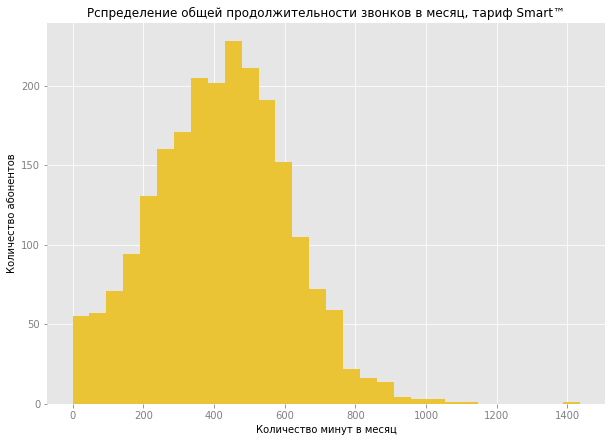

In [39]:
ax = plt.axes()
df.query('tariff == "smart"')['duration'].plot(kind = 'hist', bins = 30, range = (0,1435),grid = True)
plt.title('Рспределение общей продолжительности звонков в месяц, тариф Smart™')
plt.ylabel('Количество абонентов')
plt.xlabel('Количество минут в месяц')
plt.show()

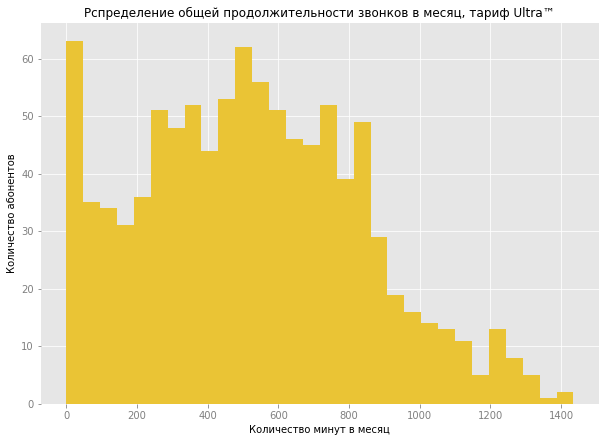

In [40]:
ax = plt.axes()
df.query('tariff == "ultra"')['duration'].plot(kind = 'hist', bins = 30, range = (0,1435),grid = True)
plt.title('Рспределение общей продолжительности звонков в месяц, тариф Ultra™')
plt.ylabel('Количество абонентов')
plt.xlabel('Количество минут в месяц')
plt.show()

Средняя продожительность звонков на тарифах ultra больше.    

Распредение значений нормальное в обоих случаях, но на тарифах ultra наблюдается пик в районе нулевых значений продолжительности звонка - обладатели этих тарифов часто не отвечают на звонки, или их собеседники не берут трубки.

 ### Сообщения

Изучим количество сообщений в месяц у пользователей обоих тарифов.  
Посчитаем среднее, дисперсию, стандартное отклонение и построим гистограммы.

In [41]:
df.groupby('tariff').agg({'count_msg': ['mean','var','std']}).style.format("{:.0f}")

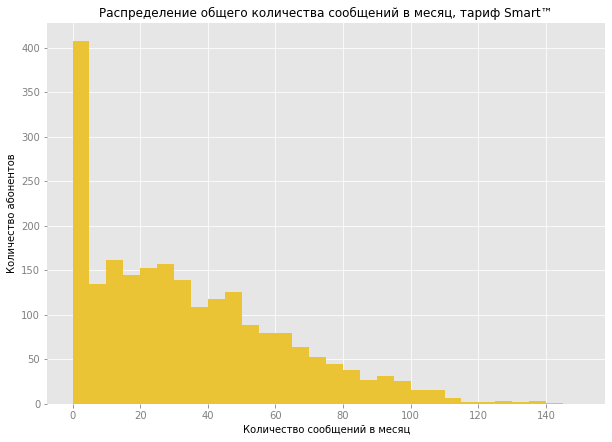

In [42]:
ax = plt.axes()
df.query('tariff == "smart"')['count_msg'].plot(kind = 'hist', bins = 30, range = (0,150),grid = True)
plt.title('Распределение общего количества сообщений в месяц, тариф Smart™')
plt.ylabel('Количество абонентов')
plt.xlabel('Количество сообщений в месяц')
plt.show()

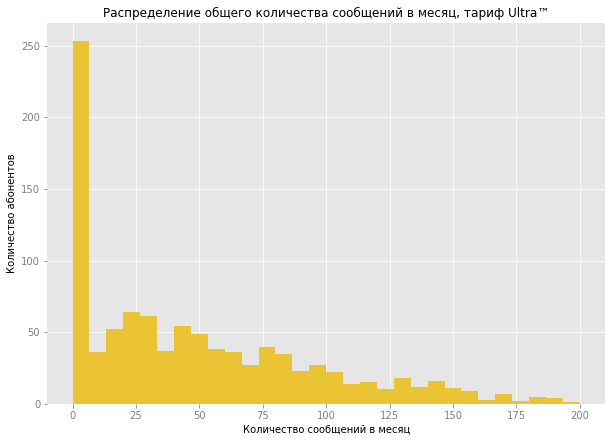

In [43]:
ax = plt.axes()
df.query('tariff == "ultra"')['count_msg'].plot(kind = 'hist', bins = 30, range = (0,200),grid = True)
plt.title('Распределение общего количества сообщений в месяц, тариф Ultra™')
plt.ylabel('Количество абонентов')
plt.xlabel('Количество сообщений в месяц')

plt.show()

Распределение для обоих тарифов нормальное, с большими пиками у нулевых значений - в настоящее время все меньше пользователей пользуются функцией сообщений.
Среди тех, кому это еще актуально, больше сообщений отправляют пользователи тарифов Ultra.

### Интернет

Изучим количество использованного трафика в месяц у пользователей обоих тарифов.  
Посчитаем среднее, дисперсию, стандартное отклонение и построим гистограммы.

In [44]:
df.groupby('tariff').agg({'gb_used': ['mean','var','std']}).style.format("{:.0f}")


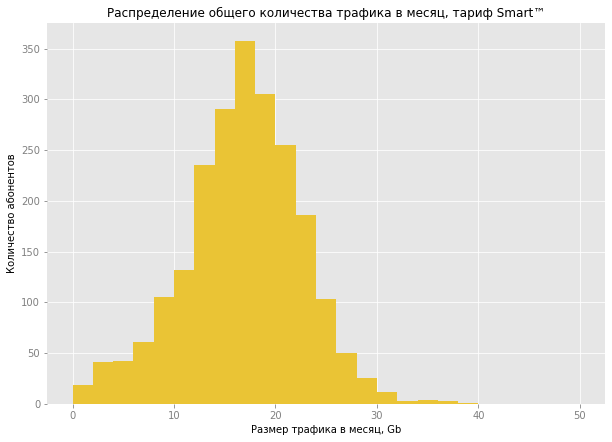

In [45]:
ax = plt.axes()
df.query('tariff == "smart"')['gb_used'].plot(kind = 'hist', bins = 25, range = (0,50),grid = True)
plt.title('Распределение общего количества трафика в месяц, тариф Smart™')
plt.ylabel('Количество абонентов')
plt.xlabel('Размер трафика в месяц, Gb')
plt.show()

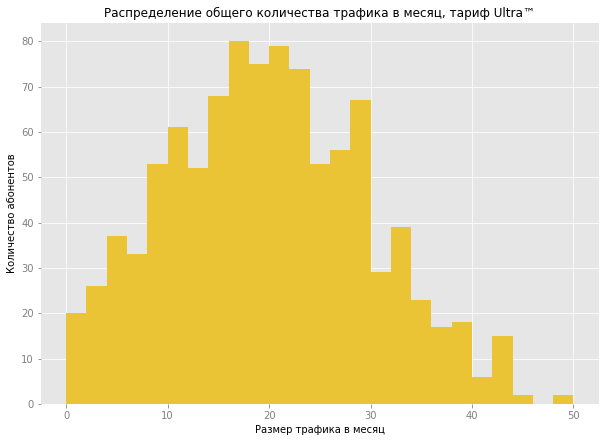

In [46]:
ax = plt.axes()
df.query('tariff == "ultra"')['gb_used'].plot(kind = 'hist', bins = 25, range = (0,50),grid = True)
plt.title('Распределение общего количества трафика в месяц, тариф Ultra™')
plt.ylabel('Количество абонентов')
plt.xlabel('Размер трафика в месяц')

plt.show()

Среднее количество израсходованного трафика на тарифах ultra больше.  
Распредение значений нормальное в обоих случаях.

### Итоги

В среднем в месяц для пользователей тарифов smart требуется:
 - 417 минут разговора.
 - 33 сообщения.
 - 16 гигабайт трафика.

В среднем в месяц для пользователей тарифов ultra требуется:
 - 527 минут разговора.
 - 49 сообщений.
 - 19 гигабайт трафика.

Для пользователей тарифов ultra требуется больше минут, сообщений и трафика.  
Так же на графиках распределния количества сообщений было обнаружено, что большое количество абонентов обоих тарифов этой функцией не пользуются вообще.

## Проверка гипотез

 Проверим следующие гипотезы:
 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

### Первая гипотеза

Сравним среднюю выручку пользователей тарифов в представленной выборке.

In [47]:
df.groupby('tariff').agg({'revenue':'mean'}).style.format("{:.0f}")

,revenue
tariff,
smart,1290
ultra,2070


Сформируем нулевую и альтернативную гипотезу:
- Нулевая гипотеза - средние выручки для двух тарифов равны.
- Альтернативная гипотеза - средние выручки для двух тарифов отличаются.

Попробуем отвергнуть нулевую гипотезу:
 - Создадим два массива с данными о выручке пользователей двух тарифов
 - С помощью  метода st.ttest_ind сравним уровень значимости стастистики разности средних этих массивов.  
 - Сравним полученный уровень значимости с допустимым - 0.05.

In [48]:
array_smart = df.query('tariff == "smart"')['revenue'].tolist()
array_ultra = df.query('tariff == "ultra"')['revenue'].tolist()

alpha = 0.05

results = st.ttest_ind(array_smart, array_ultra)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


### Итоги

Нулевая гипотеза отвергнута - следовательно выручки для двух тарифов отличаются.  
Средняя выручка тарифов ultra в выборке больше - можем утверждать то же самое и для всей генеральной совокупности.

### Вторая гипотеза

Сравним среднюю выручку пользователей из Москвы с представителями других регионов в представленной выборке.

In [49]:
df.groupby('region').agg({'revenue':'mean'}).style.format("{:.0f}")

,revenue
region,
Москва,1547
другой,1525


Сформируем нулевую и альтернативную гипотезу:
 - Нулевая гипотеза - средния выручка для пользователей из Москвы не отличается от выручки пользователей из других регионов.  
 - Альтернативная гипотеза - средния выручка для пользователей из Москвы отличается.

Попробуем отвергнуть нулевую гипотезу:
 - Создадим два массива с данными о выручке пользователей из Москвы и из других регионов.
 - С помощью  метода st.ttest_ind сравним уровень значимости стастистики разности средних этих массивов.  
 - Сравним полученный уровень значимости с допустимым - 0.05.

In [50]:
array_smart = df.query('region == "Москва"')['revenue'].tolist()
array_ultra = df.query('region == "другой"')['revenue'].tolist()

alpha = 0.05

results = st.ttest_ind(array_smart, array_ultra)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


### Итоги

Отвергнуть нулевую гипотезу не получилось - с довольно большой вероятностью можем утверждать, что средняя выручка в Москве не отличается от выручки в других регионах. 

## Выводы

В ходе исследования были сделаны следующие выводы:

- Было посчитано количество минут разговора, количество сообщений и объём интернет-трафика в среднем требуемый пользователям каждого тарифа в месяц:
  - Тариф smart: 417 минут, 33 сообщения, 16 гигабайт трафика. 
  - Тариф ultra: 527 минут, 49 сообщений, 19 гигабайт трафика.
- Была подтверждена гипотеза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается - средняя выручка тарифов Smart оказалась больше.
- Была опровергнута гипотеза о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Беря во внимание все вышесказанное приходим к основному выводу исследования - тариф ultra оказался лучше. Он приносит больше прибыли при небольшом увеличении количества потребляемых минут, сообщений и трафика абонентами сети "Мегалайн".